In [3]:
!pip install matplotlib
!pip install sklearn
!pip install yellowbrick
!pip install seaborn

  Using cached sklearn-0.0.post9.tar.gz (3.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [4]:
# 필요 모듈 설치

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.cm as cm
from pandas.plotting import parallel_coordinates
import seaborn as sns

# K리그 데이터를 논문에 대입(Classifying football players using cluster analysis)

## 불러오기 및 전처리

이 코드는 데이터를 불러오고 전처리하는 함수인 `load_embeddings`를 정의하는 것으로 보입니다. 주석을 통해 코드의 목적과 각 단계에 대한 설명이 제공되었습니다. 아래는 코드의 요약입니다:

1. 데이터 파일을 불러오는 단계:
   - `pd.read_excel('4_data.xlsx')`를 사용하여 '4_data.xlsx' 파일을 읽어 데이터 프레임 `df_raw`에 저장합니다.

2. 결측값 처리:
   - 데이터 프레임 내의 결측값(누락된 데이터)을 확인하고, 결측값이 있을 경우 0으로 채웁니다.

3. 데이터 복사:
   - `df_raw` 데이터프레임을 `df_raw_scaled`로 복사합니다.

4. 열 이름 설정:
   - 데이터프레임에서 분석에 필요한 열을 선택하여 `col_names`에 저장합니다.
   - 이때, '시즌(년도)', '리그', '계절', '소속', '라운드', '상대팀', '선수명', '포지션', '등번호', '생년월일', '나이' 열은 선택하지 않습니다.
   - 'Unnamed: 0' 열도 제외됩니다.

5. 스케일링:
   - 선택한 피처 열을 스케일링하기 위해 `StandardScaler()`를 사용하여 스케일러를 초기화합니다.
   - 스케일러를 사용하여 데이터를 스케일링합니다.

6. 정규화:
   - Z-score를 사용하여 데이터를 정규화합니다. 이것은 각 피처의 평균이 0이고 표준 편차가 1이 되도록 데이터를 변환합니다.

7. 처리된 데이터 반환:
   - 처리된 데이터를 반환합니다. `df_raw_scaled`는 전처리된 데이터를 포함하고 있습니다.

이 함수를 호출하면 데이터를 불러오고 처리한 후, 스케일링 및 정규화된 데이터를 반환합니다. 이 데이터를 이후의 분석이나 모델링에 사용할 수 있습니다.

In [ ]:
df_raw = pd.read_excel('4_data.xlsx')

KeyboardInterrupt: 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 논문에서는 선수이름, 포지션, 경기출전시간을 제거하였으며, 에러를 무시처리하였음.
# col_names = df_raw.columns.drop(['Player', 'Pos', 'Min'],errors='ignore')
# 하지만 우리가 가지고 있는 데이터셋은 이것보다 더 큰 크기를 가지므로 경기와 외적 데이터는 1차적으로 지우도록 하였음.
# 단, 해당 논문은 1년치 데이터를 기준으로 하여 출장시간을 제거하였으나, 여기서는 출장시간을 가지고 가도록했음.

# 파일 값을 불러오는 함수 제작

df_raw = pd.read_excel('4_data.xlsx')
# 이미 처리하기는 했지만, 결측값이 있다면 0으로 채우기
df_raw = df_raw.fillna(0)
# 데이터셋 복사
df_raw_scaled = df_raw.copy()

col_names = df_raw.columns.drop(['Unnamed: 0', '시즌(년도)', '리그', '계절', '소속', '라운드', '상대팀', '선수명', '포지션', '등번호', '생년월일', '나이'])

# 피처의 이름 설정(1차적 데이터 제거 후의 칼럼 이름 사용)
features = df_raw_scaled[col_names]

# 스케일러를 사용하여 데이터를 붙임.
scaler = StandardScaler().fit(features.values)

# 피처값을 스케일러로 변형시킴.
features = scaler.transform(features.values)

# Z-score를 통한 정규화?
df_raw_scaled[col_names] = features

In [ ]:
[col_names]

[Index(['출전시간(분)', '득점', '도움', '슈팅', '유효슈팅', '블락된슈팅', '벗어난슈팅', 'PA내슈팅', 'PA외슈팅',
        '오프사이드', '프리킥', '코너킥', '스로인', '드리블시도', '드리블성공', '패스시도', '패스성공', '키패스',
        '전방패스시도', '전방패스성공', '후방패스시도', '후방패스성공', '횡패스시도', '횡패스성공', '공격진영패스시도',
        '공격진영패스성공', '수비진영패스시도', '수비진영패스성공', '중앙진영패스시도', '중앙진영패스성공', '롱패스시도',
        '롱패스성공', '중거리패스시도', '중거리패스성공', '단거리패스시도', '단거리패스성공', '크로스시도', '크로스성공',
        '탈압박', '지상경합시도', '지상경합성공', '공중경합시도', '공중경합성공', '태클시도', '태클성공', '클리어링',
        '인터셉트', '차단', '획득', '블락', '볼미스', '파울', '피파울', '경고', '퇴장', '키', '몸무게'],
       dtype='object')]

In [ ]:
df_raw_scaled[col_names]

,출전시간(분),득점,도움,슈팅,유효슈팅,블락된슈팅,벗어난슈팅,PA내슈팅,PA외슈팅,오프사이드,...,차단,획득,블락,볼미스,파울,피파울,경고,퇴장,키,몸무게
0,0.896424,-0.274208,3.975316,7.213521,8.070739,6.171932,1.028421,6.727858,3.934674,-0.270830,...,-0.849672,-0.157914,-0.626808,-0.608709,-0.808749,2.988713,-0.360268,-0.05173,0.947265,0.234707
1,0.896424,-0.274208,-0.224656,1.950203,1.249888,-0.379424,2.577411,3.096333,-0.494126,2.625050,...,0.028913,-0.157914,0.122859,0.733006,0.147706,2.988713,-0.360268,-0.05173,0.947265,0.234707
2,0.896424,-0.274208,-0.224656,-0.681455,-0.455325,-0.379424,-0.520569,-0.535193,-0.494126,2.625050,...,-0.849672,-0.983014,0.872526,2.074720,2.060616,0.173607,-0.360268,-0.05173,0.947265,0.234707
3,1.061386,-0.274208,-0.224656,2.827423,-0.455325,3.988147,2.577411,3.096333,0.982141,2.625050,...,-0.849672,-0.432947,0.122859,-0.608709,0.147706,3.927081,-0.360268,-0.05173,0.947265,0.234707
4,0.236574,-0.274208,-0.224656,0.195764,1.249888,-0.379424,-0.520569,-0.535193,0.982141,5.520929,...,-0.849672,-0.707980,0.122859,3.416435,3.017071,0.173607,5.628035,-0.05173,0.947265,0.234707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44209,0.830439,-0.274208,-0.224656,-0.681455,-0.455325,-0.379424,-0.520569,-0.535193,-0.494126,-0.270830,...,-0.849672,-0.983014,-0.626808,-0.608709,-0.808749,-0.764762,-0.360268,-0.05173,0.947265,-0.196741
44210,0.830439,-0.274208,-0.224656,-0.681455,-0.455325,-0.379424,-0.520569,-0.535193,-0.494126,-0.270830,...,-0.849672,-0.707980,-0.626808,-0.608709,-0.808749,-0.764762,-0.360268,-0.05173,0.947265,-0.196741
44211,0.896424,-0.274208,-0.224656,-0.681455,-0.455325,-0.379424,-0.520569,-0.535193,-0.494126,-0.270830,...,-0.849672,-0.432947,0.122859,-0.608709,-0.808749,-0.764762,-0.360268,-0.05173,0.947265,-0.196741
44212,0.830439,-0.274208,-0.224656,-0.681455,-0.455325,-0.379424,-0.520569,-0.535193,-0.494126,-0.270830,...,-0.849672,-0.432947,-0.626808,-0.608709,-0.808749,-0.764762,-0.360268,-0.05173,0.947265,-0.196741


## PCA 차원축소

이 코드는 PCA(Principal Component Analysis, 주성분 분석)를 사용하여 주어진 데이터 프레임의 차원을 축소하는 함수인 `pca_dim_reduction`을 정의하는 것으로 보입니다. 이 함수는 데이터의 주성분을 추출하고 데이터를 주성분 공간으로 변환합니다.

아래는 코드의 요약입니다:

1. `pca_dim_reduction` 함수는 하나의 인자 `df_scaled`를 받습니다. 이 데이터 프레임은 PCA를 수행할 데이터입니다.

2. 함수 내부에서:
   - 입력 데이터 프레임 `df_scaled`는 pandas DataFrame으로 변환되며 선택한 열만 유지됩니다.
   - `components` 변수에는 주성분의 수가 설정되어 있습니다. 여기서는 2개의 주성분을 추출하도록 설정되어 있습니다.
   - `PCA` 객체를 생성하고 `components` 값을 사용하여 주성분을 추출합니다.
   - 주성분 분석을 수행하고 변환된 결과를 `pca_2_result`에 저장합니다.
   - 주성분의 설명된 분산 비율을 출력합니다. 이 비율은 각 주성분이 데이터의 분산을 얼마나 잘 설명하는지를 나타냅니다.
   - 주요 성분의 설명된 분산의 누적 값을 출력합니다.
   - 각 주성분의 설명된 분산 비율을 시각화합니다.

3. 마지막으로, 변환된 데이터와 PCA 객체를 반환합니다.

이 함수를 사용하려면 `df_scaled`에 PCA를 적용하고 데이터의 주성분을 추출하려는 경우에 호출할 수 있습니다. 주성분 분석은 데이터의 차원을 축소하고 데이터의 주요 특징을 포착하는 데 사용됩니다.

Column 당 Explained variance:[0.25237271 0.1310055 ]
누적 분산: 2 주요 성분(Column): 38.34%


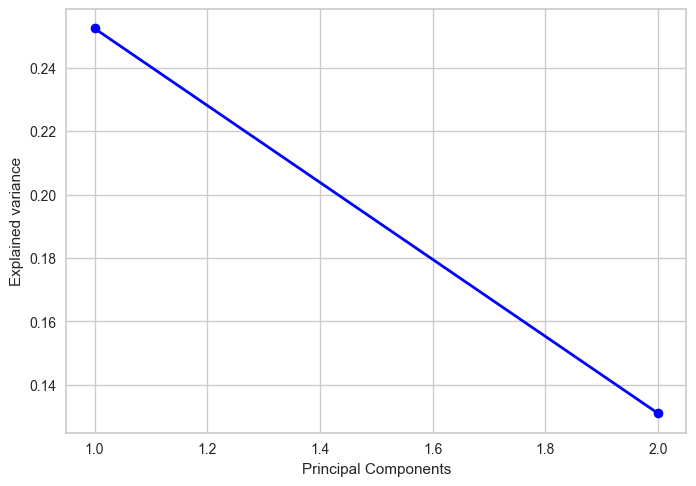

[[-1.31846436  6.97232867]
 [-2.4718635   2.52153998]
 [-2.21451571  1.17087168]
 ...
 [-1.73888497 -4.25423658]
 [-1.84868653 -3.75057221]
 [-3.84816352 -2.92886184]] PCA(n_components=2)


In [ ]:
#reducing using PCA(rincipal Component Analysis, 주성분 분석) -> 차원축소 실시
df_scaled = df_raw_scaled[col_names]
components = 4
pca_2 = PCA(components)
pca_2_result = pca_2.fit_transform(df_scaled)
print('Column 당 Explained variance:{}'.format(pca_2.explained_variance_ratio_))
print('누적 분산:', str(components), '주요 성분(Column): {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))
PC_values = np.arange(pca_2.n_components_) + 1
plt.plot(PC_values, pca_2.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Explained variance')
plt.show()
print(pca_2_result, pca_2)



## K값 선별법



당신이 제공한 코드는 K-means 클러스터링을 수행할 때 최적의 클러스터 수 (k)를 선택하는 데 사용되는 `gapK` 함수를 정의하는 것으로 보입니다. 이 함수는 다양한 k 값에 대한 Gap 통계량을 계산하고 적절한 클러스터 수를 결정하는 데 도움을 주기 위해 그것을 플로팅합니다.

코드를 요약하면 다음과 같습니다:

1. `gapK` 함수는 여러 매개변수를 사용합니다:
   - `df`: 입력 데이터 프레임.
   - `nrefs`: 비교를 위해 무작위 참조 데이터를 생성하는 횟수 (기본값은 3).
   - `maxClusters`: 고려할 수 있는 최대 클러스터 수 (기본값은 30).

2. 함수 내부에서:
   - 입력 데이터 프레임 `df`는 pandas DataFrame으로 변환되며 `df_scaled`를 사용하여 스케일이 조정될 수 있습니다 (이 함수가 다른 곳에서 정의되어 있다고 가정).
   - 빈 배열 `gaps`가 생성되어 각 k 값에 대한 Gap 통계를 저장합니다.
   - 빈 pandas DataFrame `resultsdf`가 생성되어 클러스터 수 (`ClusterCount`)와 Gap 통계 (`gap`)를 포함한 결과를 저장합니다.

3. 함수는 그런 다음 k 값이 1에서 `maxClusters`까지의 범위에 대해 반복됩니다:
   - 각 k 값에 대해 `nrefs`만큼의 무작위 참조 데이터를 생성하고 각 참조 데이터 집합에 대한 클러스터 내 합계 제곱 (이너셔)을 계산합니다.
   - 또한 k 클러스터를 사용하여 원래 데이터에 대한 이너셔를 계산합니다.
   - 현재 k 값에 대한 Gap 통계는 참조 데이터 이너셔의 로그 평균과 원래 데이터 이너셔의 로그 차이로 계산됩니다.
   - 현재 k 값에 대한 Gap 통계는 `gaps` 배열에 저장되고 `resultsdf` DataFrame은 현재의 `ClusterCount`와 Gap 값으로 업데이트됩니다.

4. 모든 k 값에 대한 반복이 완료되면 코드는 Matplotlib을 사용하여 Gap 통계를 클러스터 수에 대한 그래프로 그립니다.

5. 마지막으로, 함수는 최대 Gap 통계에 따라 결정된 최적의 클러스터 수 (k 값)와 Gap 통계를 다양한 k 값에 대해 포함하는 `resultsdf` DataFrame을 반환합니다.

이 함수를 사용하려면 일반적으로 데이터 집합 `df`를 인수로 전달하고 그래프를 검사하여 Gap 통계가 수렴하거나 "엘보" 지점이 나타나는 k 값을 선택하게 됩니다. 이는 데이터에 대한 최적의 클러스터 수를 나타냅니다.

c:\Users\bewis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bewis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bewis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bewis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

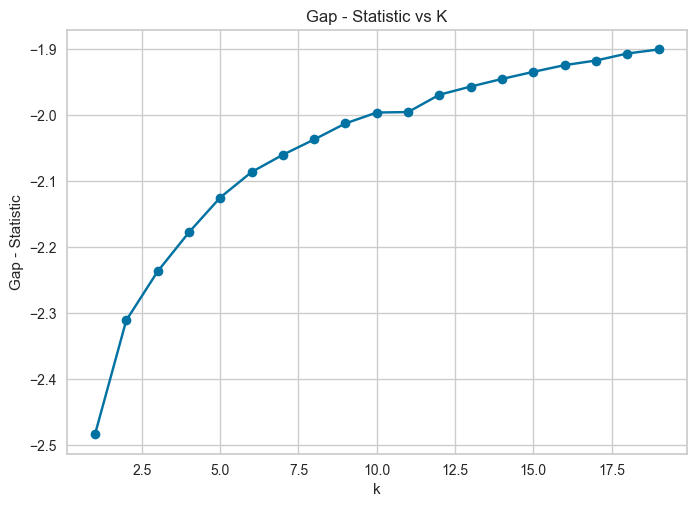

19     ClusterCount       gap
0            1.0 -2.484115
1            2.0 -2.311061
2            3.0 -2.236983
3            4.0 -2.177722
4            5.0 -2.124860
5            6.0 -2.086278
6            7.0 -2.060052
7            8.0 -2.036866
8            9.0 -2.012482
9           10.0 -1.995978
10          11.0 -1.995282
11          12.0 -1.968982
12          13.0 -1.956585
13          14.0 -1.945031
14          15.0 -1.934275
15          16.0 -1.924109
16          17.0 -1.917091
17          18.0 -1.906483
18          19.0 -1.900370


In [ ]:
# K값 선별법

df = df_raw_scaled[col_names]
nrefs=3
maxClusters=30

gaps = np.zeros((len(range(1, maxClusters)),))
resultsdf = pd.DataFrame({'ClusterCount':[], 'gap':[]})
for index, k in enumerate(range(1, maxClusters)):
    refDisps = np.zeros(nrefs)
    for i in range(nrefs):
        randomReference = np.random.random_sample(size=df.shape)
        km = KMeans(k)
        km.fit(randomReference)
        refDisp = km.inertia_
        refDisps[i] = refDisp
    km = KMeans(k)
    km.fit(df)
    origDisp = km.inertia_
    gap = np.log(np.mean(refDisps)) - np.log(origDisp)
    gaps[index] = gap
    resultsdf = pd.concat([resultsdf, pd.DataFrame({'ClusterCount': [k], 'gap': [gap]})], ignore_index=True)
plt.plot(resultsdf['ClusterCount'], resultsdf['gap'],linestyle='-', marker='o', color='b')
plt.xlabel('k')
plt.ylabel('Gap - Statistic')
plt.title('Gap - Statistic vs K')
plt.show()
print(gaps.argmax() + 1, resultsdf)

## elbow method

이 코드는 K-means 클러스터링에서 최적의 클러스터 수를 찾기 위해 "elbow method"를 사용하는 함수인 `elbowK`를 정의하는 것으로 보입니다. 주요 요약은 다음과 같습니다:

1. `elbowK` 함수는 하나의 인자 `df`를 받습니다. 이 데이터 프레임은 클러스터링을 수행할 데이터를 포함합니다.

2. 함수 내부에서:
   - 입력 데이터 프레임 `df`는 pandas DataFrame으로 변환되며 선택한 열만 유지됩니다.
   
   - `KMeans()` 모델을 초기화합니다. 이 모델은 K-means 클러스터링을 수행하는 데 사용됩니다.
   
   - `KElbowVisualizer`를 초기화합니다. 이는 `KMeans` 모델을 사용하여 클러스터 수 범위를 탐색하고 "elbow"를 시각적으로 확인하기 위해 사용됩니다. `k` 매개변수는 클러스터 수 범위를 지정합니다 (여기서는 2에서 30까지 탐색합니다). `timings` 매개변수는 클러스터링에 소요된 시간을 기록할지 여부를 지정합니다.
   
   - `KElbowVisualizer`를 사용하여 클러스터링을 수행하고 "elbow" 포인트를 찾습니다. 이 포인트는 클러스터 수에 대한 변동성이 급격하게 줄어드는 지점으로, 최적의 클러스터 수로 간주됩니다.
   
   - "elbow" 포인트를 시각적으로 나타내기 위해 `visualizer.show()`를 호출합니다.

3. 최적의 클러스터 수를 반환:
   - `getattr(visualizer, 'elbow_value_')`를 사용하여 `visualizer` 객체에서 "elbow" 포인트의 값을 가져옵니다. 이 값은 함수의 반환값으로 제공됩니다.

이 함수를 호출하면 데이터를 클러스터링하고 최적의 클러스터 수를 결정하기 위한 "elbow method"를 시각적으로 확인할 수 있습니다. 이 최적의 클러스터 수는 데이터의 특성에 따라 다를 수 있으며, "elbow" 메서드는 이를 탐색하는 데 도움을 줍니다.

c:\Users\bewis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bewis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bewis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bewis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

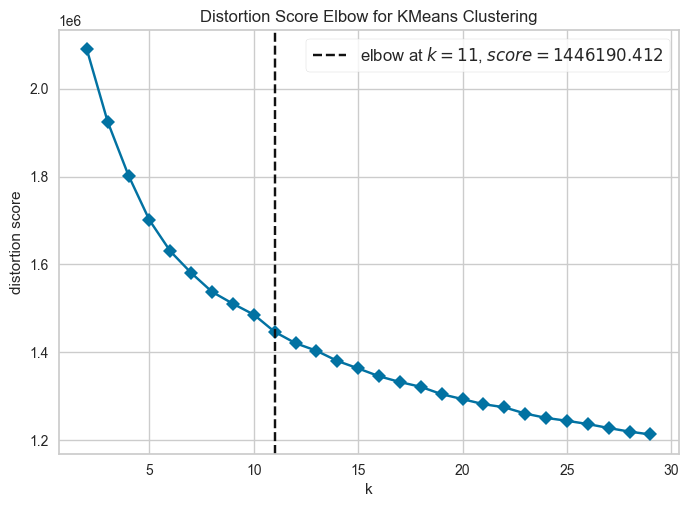

11


In [ ]:

df = df_raw_scaled[col_names]
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), timings=False)
visualizer.fit(df)
visualizer.show()
print(getattr(visualizer, 'elbow_value_'))

## silhouette score

이 코드는 K-means 클러스터링에서 최적의 클러스터 수를 찾기 위해 "silhouette score"를 사용하는 함수인 `silhouetteK`를 정의하는 것으로 보입니다. 아래는 코드의 주요 내용을 요약한 것입니다:

1. `silhouetteK` 함수는 하나의 인자 `df`를 받습니다. 이 데이터 프레임은 클러스터링을 수행할 데이터를 포함합니다.

2. 함수 내부에서:
   - 입력 데이터 프레임 `df`는 pandas DataFrame으로 변환되며 선택한 열만 유지됩니다.
   
   - `KMeans()` 모델을 초기화합니다. 이 모델은 K-means 클러스터링을 수행하는 데 사용됩니다.
   
   - `KElbowVisualizer`를 초기화합니다. 이는 `KMeans` 모델을 사용하여 클러스터 수 범위를 탐색하고 "silhouette score"를 기반으로 최적의 클러스터 수를 찾기 위해 사용됩니다. `k` 매개변수는 클러스터 수 범위를 지정합니다 (여기서는 2에서 30까지 탐색합니다). `metric` 매개변수는 클러스터링 품질을 측정하는 데 사용되는 메트릭으로, 여기서는 'silhouette'로 설정됩니다. `timings` 매개변수는 클러스터링에 소요된 시간을 기록할지 여부를 지정합니다.
   
   - `KElbowVisualizer`를 사용하여 클러스터링을 수행하고 "silhouette score"에 기반하여 최적의 클러스터 수를 결정합니다.
   
   - 최적의 클러스터 수를 시각적으로 나타내기 위해 `visualizer.show()`를 호출합니다.

3. 최적의 클러스터 수를 반환:
   - `getattr(visualizer, 'elbow_value_')`를 사용하여 `visualizer` 객체에서 최적의 클러스터 수를 가져옵니다. 이 값은 함수의 반환값으로 제공됩니다.

이 함수를 호출하면 데이터를 클러스터링하고 "silhouette score"를 기반으로 최적의 클러스터 수를 결정할 수 있습니다. "silhouette score"는 클러스터링 품질을 측정하는 지표로, 높은 점수가 얻어지는 클러스터링이 더 좋은 결과를 나타냄을 나타냅니다.

c:\Users\bewis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bewis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bewis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bewis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

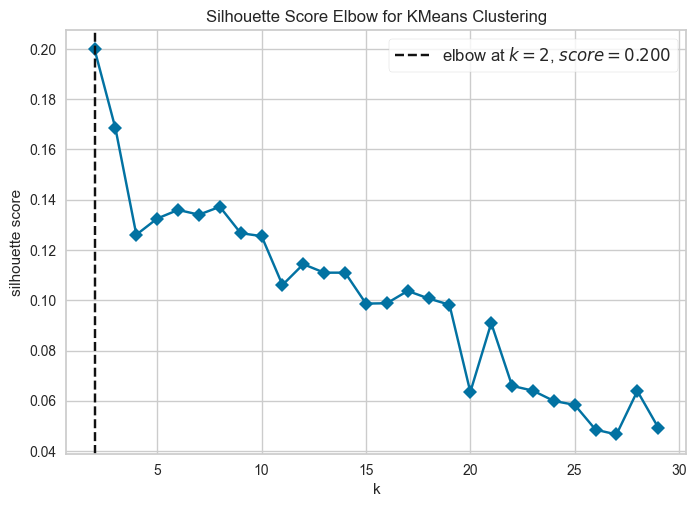

2


In [ ]:

df = df_raw_scaled[col_names]
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings=False)
visualizer.fit(df)
visualizer.show()
print(getattr(visualizer, 'elbow_value_'))

## Calinski-Harabasz Index

이 코드는 K-means 클러스터링에서 최적의 클러스터 수를 찾기 위해 "Calinski-Harabasz Index"를 사용하는 함수인 `calharK`를 정의하는 것으로 보입니다. 아래는 코드의 주요 내용을 요약한 것입니다:

1. `calharK` 함수는 하나의 인자 `df`를 받습니다. 이 데이터 프레임은 클러스터링을 수행할 데이터를 포함합니다.

2. 함수 내부에서:
   - 입력 데이터 프레임 `df`는 pandas DataFrame으로 변환되며 선택한 열만 유지됩니다.
   
   - `KMeans()` 모델을 초기화합니다. 이 모델은 K-means 클러스터링을 수행하는 데 사용됩니다.
   
   - `KElbowVisualizer`를 초기화합니다. 이는 `KMeans` 모델을 사용하여 클러스터 수 범위를 탐색하고 "Calinski-Harabasz Index"를 기반으로 최적의 클러스터 수를 찾기 위해 사용됩니다. `k` 매개변수는 클러스터 수 범위를 지정합니다 (여기서는 2에서 30까지 탐색합니다). `metric` 매개변수는 클러스터링 품질을 측정하는 데 사용되는 메트릭으로, 여기서는 'calinski_harabasz'로 설정됩니다. `timings` 매개변수는 클러스터링에 소요된 시간을 기록할지 여부를 지정합니다.
   
   - `KElbowVisualizer`를 사용하여 클러스터링을 수행하고 "Calinski-Harabasz Index"에 기반하여 최적의 클러스터 수를 결정합니다.
   
   - 최적의 클러스터 수를 시각적으로 나타내기 위해 `visualizer.show()`를 호출합니다.

3. 최적의 클러스터 수를 반환:
   - `getattr(visualizer, 'elbow_value_')`를 사용하여 `visualizer` 객체에서 최적의 클러스터 수를 가져옵니다. 이 값은 함수의 반환값으로 제공됩니다.

이 함수를 호출하면 데이터를 클러스터링하고 "Calinski-Harabasz Index"를 기반으로 최적의 클러스터 수를 결정할 수 있습니다. "Calinski-Harabasz Index"는 클러스터링 품질을 측정하는 지표로, 높은 지수 값이 얻어지는 클러스터링이 더 좋은 결과를 나타냄을 나타냅니다.

c:\Users\bewis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bewis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bewis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bewis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

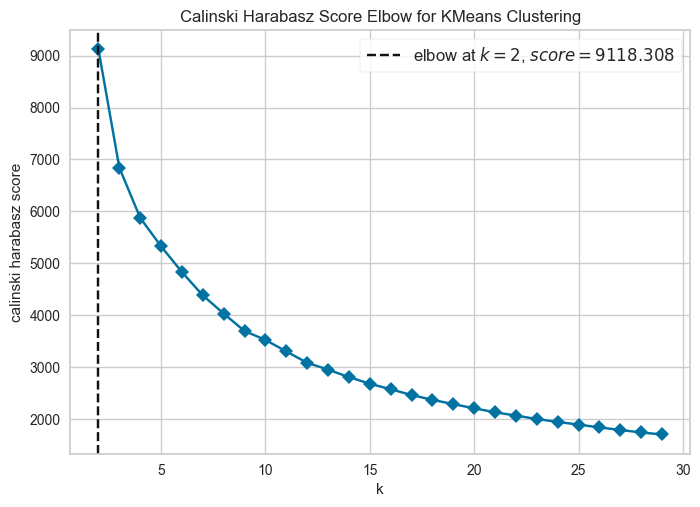

2


In [ ]:

df = df_raw_scaled[col_names]
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings=False)
visualizer.fit(df)
visualizer.show()
print(getattr(visualizer, 'elbow_value_'))

## 시각화

### K-means 클러스터링 결과 시각화

이 코드는 K-means 클러스터링 결과를 시각화하기 위한 함수 `visualizing_results`를 정의하는 것으로 보입니다. 이 함수는 주성분 분석(PCA)을 통해 축소된 데이터 (`pca_result`), 클러스터링 레이블 (`label`), 클러스터 중심 (`centroids_pca`)를 사용하여 클러스터링 결과를 시각화합니다. 아래는 코드의 주요 내용을 요약한 것입니다:

1. `visualizing_results` 함수는 여러 인자를 받습니다:
   - `pca_result`: PCA를 통해 축소된 데이터.
   - `label`: 각 데이터 포인트에 할당된 클러스터 레이블.
   - `centroids_pca`: 클러스터 중심 포인트의 좌표.
   - `data_scaled` (선택 사항): 원본 데이터 프레임. 이 값이 제공되면 각 데이터 포인트의 원본 값을 시각화에 표시할 수 있습니다.

2. 함수 내부에서:
   - `pca_result`의 첫 번째 주성분 값을 x 좌표로, 두 번째 주성분 값을 y 좌표로 사용하여 산점도를 그립니다.
   - 각 데이터 포인트는 클러스터 레이블에 따라 다른 색상으로 표시되며, 투명도가 조절되어 시각적으로 겹치는 부분을 나타냅니다.
   - 그래프의 제목, x축 레이블, y축 레이블을 설정합니다.
   - 클러스터 중심 포인트는 빨간색 'X' 마커로 표시됩니다.
   - 데이터 포인트에 해당하는 값을 해당 위치에 주석으로 추가합니다.
   - 그래프를 표시합니다.

3. `plt.tight_layout()`를 호출하여 그래프 요소들을 자동으로 조정하여 레이아웃을 최적화합니다.

4. 시각화 결과를 표시합니다.

이 함수를 호출하면 PCA를 통해 축소된 데이터와 클러스터링 결과를 시각화하여 클러스터 간의 패턴을 파악할 수 있습니다. 데이터 포인트가 주성분 공간 상에서 어떻게 클러스터되는지를 확인할 수 있으며, 클러스터 중심과 데이터 포인트의 원본 값도 표시됩니다.

In [ ]:
def visualizing_results(pca_result, label, centroids_pca, data_scaled= None):
    x = pca_result[:, 0]
    y = pca_result[:, 1]
    plt.scatter(x, y, c=label, alpha=0.5, s= 200, cmap='viridis')
    plt.title('Clusters - Kleague 1/2 2020~2023')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, linewidths=1.5, color='red', lw=1.5)
    for i in range(len(x)):
        plt.annotate(data_scaled.iloc[[i], 0].to_string(), (x[i], y[i]),fontsize=5)
        plt.tight_layout()
        plt.show()

In [ ]:
df

,PCA 1,PCA 2,cluster
0,0.01,0.1,0
1,0.10,0.2,1
2,1.00,0.3,2
3,10.00,0.4,3


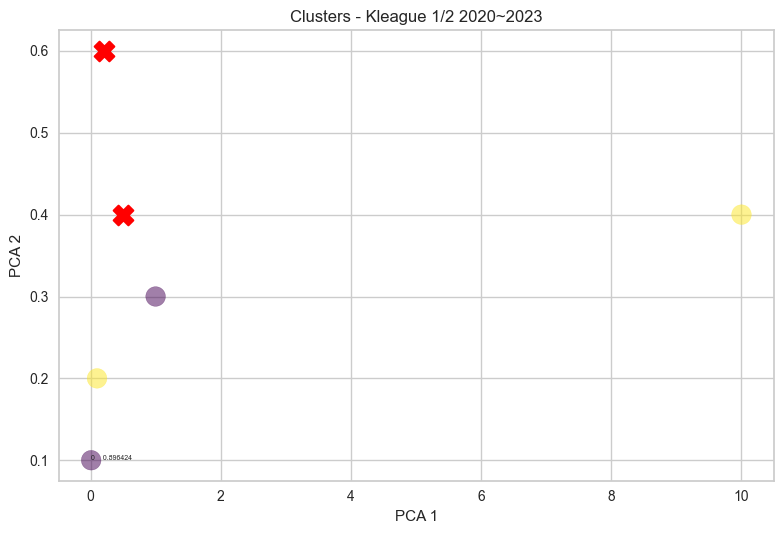

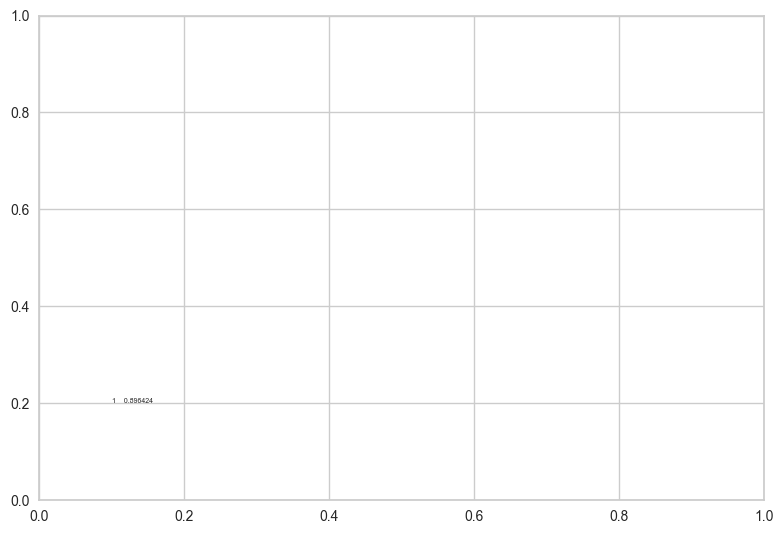

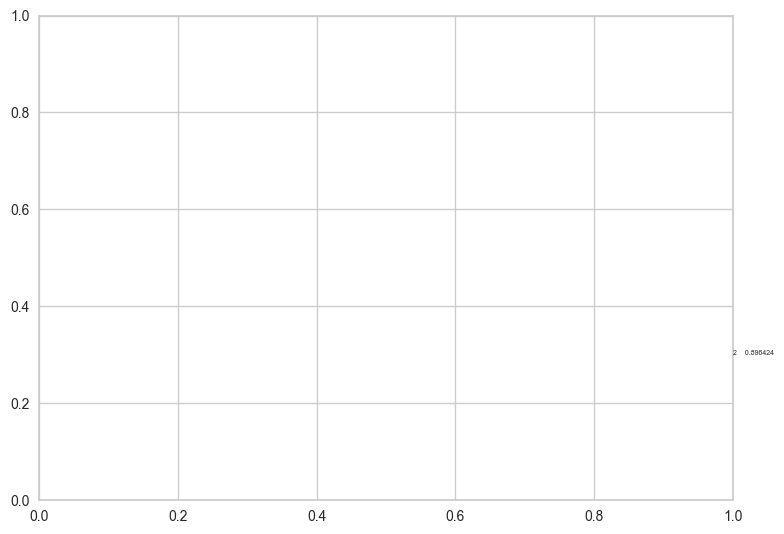

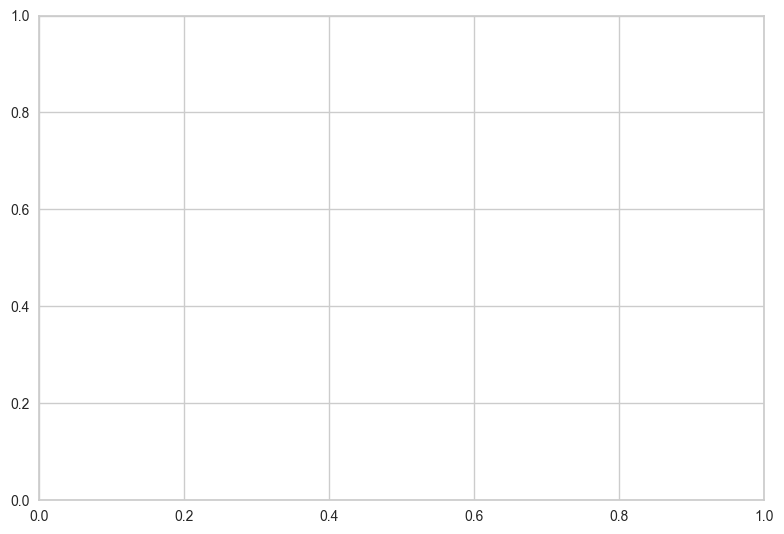

In [ ]:
# 데이터프레임과 클러스터링 결과 예시
df = pd.DataFrame({'PCA 1': [0.01, 0.1, 1, 10],
                   'PCA 2': [0.1, 0.2, 0.3, 0.4],
                   'cluster': [0, 1, 0, 1]})


# 함수 호출
centroids_pca = np.array([[0.5, 0.4], [0.2, 0.6]])  # 클러스터 중심점의 좌표 예시, 실제 데이터로 대체해야 합니다.
# 'Column_Name'을 실제 데이터프레임의 열 이름으로 대체해야 합니다.
data_scaled = df_raw_scaled[col_names]  # 'Column_Name'을 실제 데이터프레임의 열 이름으로 대체해야 합니다.
visualizing_results(df[['PCA 1', 'PCA 2']].values, df['cluster'].values, centroids_pca=centroids_pca, data_scaled=data_scaled)





### 병렬좌표플롯 시각화
이 코드는 클러스터링 결과를 시각화하기 위한 병렬 좌표 플롯을 생성하는 함수입니다. 'your_dataframe'을 실제 데이터프레임으로 대체하고 클러스터 할당 열 이름을 적절하게 수정하여 사용할 수 있습니다. 이 코드를 사용하면 각 클러스터의 특성을 시각적으로 비교할 수 있습니다. 클러스터링 결과에 따라 다른 색상으로 표시됩니다.

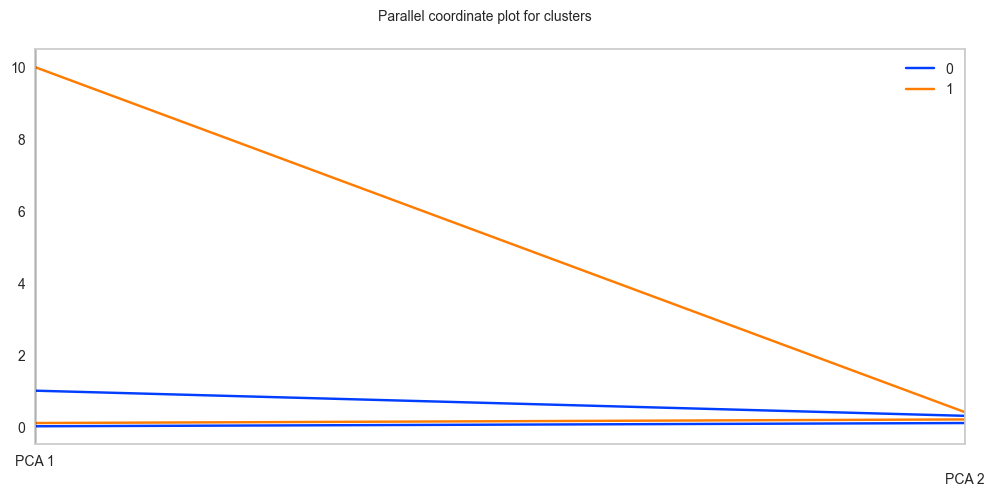

In [ ]:
fig = plt.figure(figsize=(12, 5))
title = fig.suptitle("Parallel coordinate plot for clusters",fontsize=10)
fig.subplots_adjust(top=0.9, wspace=0)
parallel_coordinates(df, 'cluster',color=sns.color_palette("bright", 10))
ax=plt.gca()
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(20)
    plt.show()